In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Parameters
S = 20  # Stock price
K = 21  # Strike price
r = 0.10  # Risk-free rate
sigma = 0.30  # Volatility
T = 1  # Time to maturity

# Grid parameters
M = 26  # Number of time steps
N = 42  # Number of price steps

# Grid spacing
dt = T / M  # Time step
dS = 2 * S / N  # Price step

# Grid
t = np.linspace(0, T, M+1)  # Time grid
S_grid = np.linspace(0, 2*S, N+1)  # Price grid

In [15]:
# Payoff at maturity (put option)
V = np.maximum(K - S_grid, 0)

# Boundary conditions
V_low = K * np.exp(-r * (T - t))  # Value of the option when S = 0
V_high = np.zeros_like(t)  # Value of the option when S is large

In [16]:
# Matrix setup
A = np.zeros((N-1, N-1))
B = np.zeros((N-1, N-1))

for i in range(N-1):
    # Diagonal elements
    A[i, i] = 1 + dt * (sigma**2 * (i+1)**2 + r)
    B[i, i] = 1 - dt * (sigma**2 * (i+1)**2 + r)

    # Off-diagonal elements
    if i != 0:
        A[i, i-1] = -0.5 * dt * (sigma**2 * (i+1)**2 - r * (i+1))
        B[i, i-1] = 0.5 * dt * (sigma**2 * (i+1)**2 - r * (i+1))
    if i != N-2:
        A[i, i+1] = -0.5 * dt * (sigma**2 * (i+1)**2 + r * (i+1))
        B[i, i+1] = 0.5 * dt * (sigma**2 * (i+1)**2 + r * (i+1))

In [17]:
# Finite difference method
for j in range(M, 0, -1):
    # Right-hand side of the system
    Bv = B @ V[1:-1]
    Bv[0] += 0.5 * dt * (sigma**2 - r) * V_low[j-1] + 0.5 * dt * (sigma**2 - r) * V_low[j]
    Bv[-1] += 0.5 * dt * (sigma**2 * N + r * N) * V_high[j-1] + 0.5 * dt * (sigma**2 * N + r * N) * V_high[j]

    # Solve the system
    V[1:-1] = solve(A, Bv)

    # Boundary conditions
    V[0] = V_low[j-1]
    V[-1] = V_high[j-1]

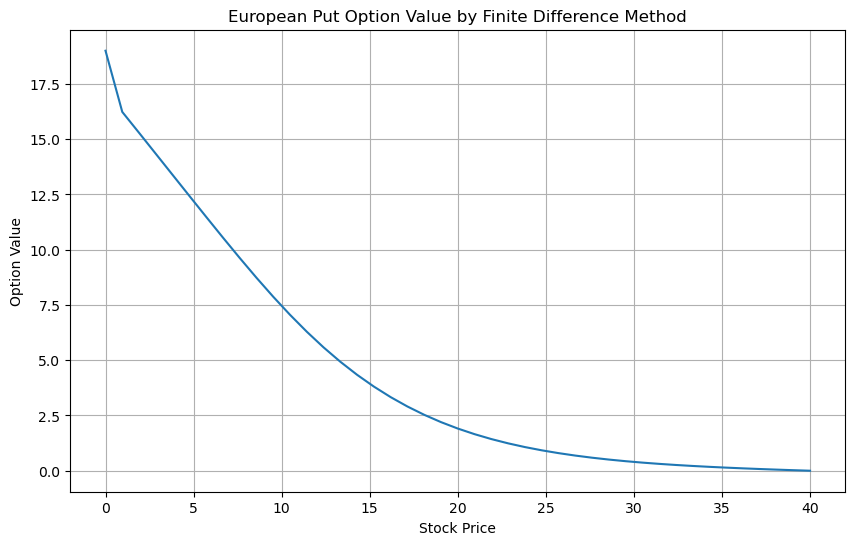

In [18]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(S_grid, V)
plt.xlabel('Stock Price')
plt.ylabel('Option Value')
plt.title('European Put Option Value by Finite Difference Method')
plt.grid(True)
plt.show()